In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset

dataset = pd.read_csv('3.2 Org_data.csv.csv')

# view first 5 rows of the data
dataset.head()

,Research,Operation,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
# check the info about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Research   50 non-null     float64
 1   Operation  50 non-null     float64
 2   Marketing  50 non-null     float64
 3   State      50 non-null     object 
 4   Profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
# check the summary statistics for the dataset

dataset.describe(include="all")

,Research,Operation,Marketing,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [3]:
# Split the data into features and target variable

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [9]:
# Encoding the state column

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("one_hot_encoder", OneHotEncoder(categories="auto"),[3])], remainder="passthrough")
X = np.array(ct.fit_transform(X), dtype=float)

In [10]:
# Avoid Dummy Variable Trap by removing one of the dummy column

X = X[:, 1:]

In [12]:
# split the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [13]:
# Fit the Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression

# create a linear regression object
lr = LinearRegression()

# fit it to the training dataset
model = lr.fit(X_train, Y_train)

In [14]:
# Predicting the test set results

Y_pred = model.predict(X_test)

In [17]:
# calculate the performance metrics

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# print the result of the performance metrics
print(f"The Mean Square Error is {mse}")
print(f"The Root Mean Square Error is {rmse}")
print(f"The R-Squared is {r2}")

The Mean Square Error is 83502864.03257468
The Root Mean Square Error is 9137.990152794797
The R-Squared is 0.9347068473282446


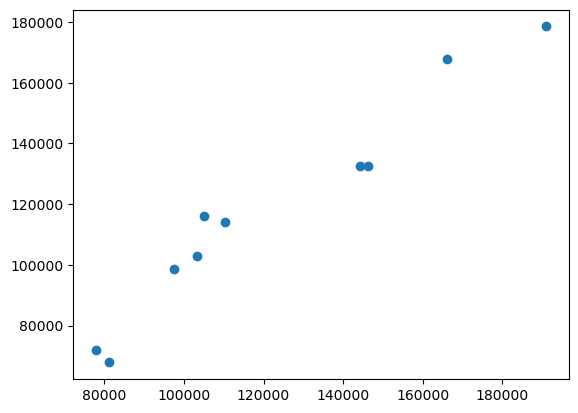

In [18]:
# visualize the Actual vs Predicted values

plt.scatter(Y_test, Y_pred)

In [ ]:
# Optimize model using backward elimination

X = np.append(arr = np.ones((X.shape[0],1)).astype(int), values=X, axis=1)

In [ ]:
# Fit the model with all possible predictors
import statsmodels.api as sm
X_opt = X[:, [0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()

# print the result
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           1.34e-27
Time:                        18:59:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

- The Backward Elimination approach says we eliminate the predictors with highest P-value, and repeat the process till we have P-values less than our chosen significant level

In [ ]:
import statsmodels.api as sm
X_opt = X[:, [0,1,3,4,5]]
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()

# print the result
print(regressor_OLS.summary())